In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

from surprise import accuracy
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
# Load the dataset
df = pd.read_csv('ratings_Electronics (1).csv')


In [3]:
df.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [4]:
# Rename the columns
df.columns = ['user_id', 'product_id', 'rating', 'timestamp']

In [5]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [32]:
# Display the first few rows
df.head()

,user_id,product_id,rating,timestamp,Year,Month
0,A2CX7LUOHB2NDG,0321732944,5.0,2012-07-01,2012,7
1,A2NWSAGRHCP8N5,0439886341,1.0,2013-04-29,2013,4
2,A2WNBOD3WNDNKT,0439886341,3.0,2013-07-22,2013,7
3,A1GI0U4ZRJA8WN,0439886341,1.0,2012-04-18,2012,4
4,A1QGNMC6O1VW39,0511189877,5.0,2014-04-14,2014,4


In [35]:
rating_stats = df['rating'].describe()

# Display the statistics
print("Descriptive Statistics for the 'rating' Column:")
print(rating_stats)

Descriptive Statistics for the 'rating' Column:
count    7.824481e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


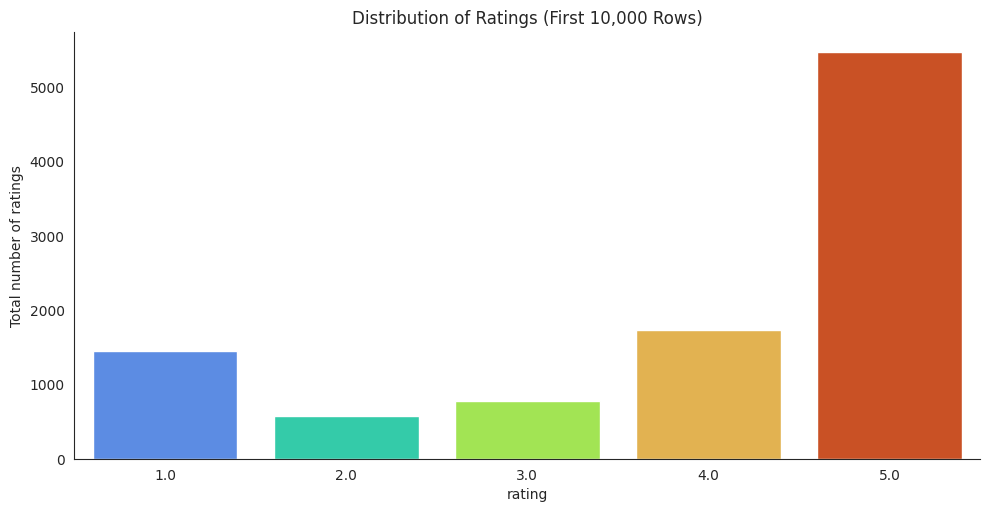

In [26]:
# Check the distribution of the rating
df_small = df.head(10000)
with sns.axes_style('white'):
    g = sns.catplot(x="rating", data=df_small, aspect=2.0, kind='count', palette='turbo')
    g.set_ylabels("Total number of ratings")
    plt.title('Distribution of Ratings (First 10,000 Rows)')
    plt.show()

user_id
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
Name: count, dtype: int64


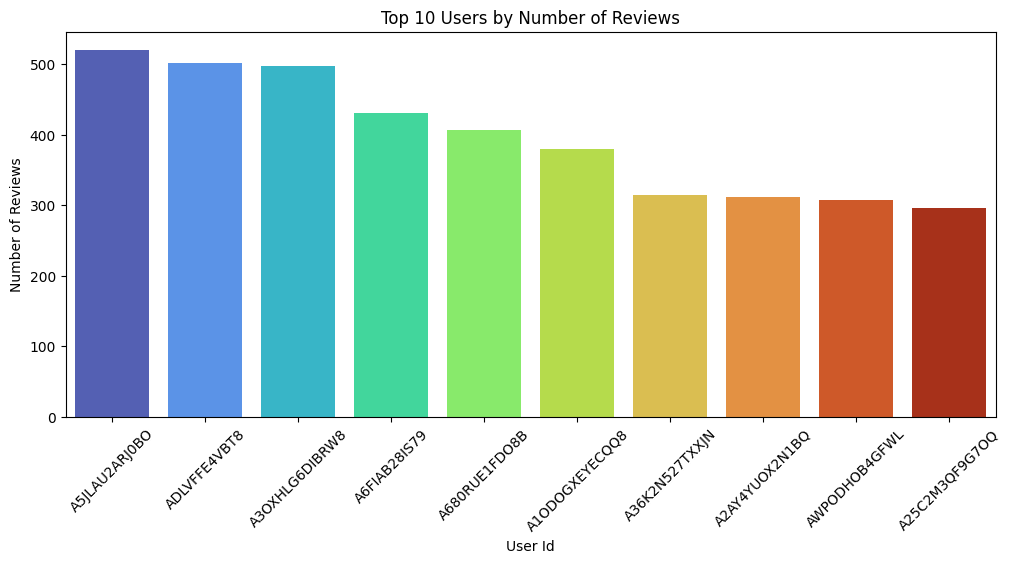

In [23]:
# Top 10 users with the most reviews
top_users = df['user_id'].value_counts().head(10)
print(top_users)

# Visualizing Top 10 users
plt.figure(figsize=(12, 5))
sns.barplot(x=top_users.index, y=top_users.values, palette='turbo')
plt.title('Top 10 Users by Number of Reviews')
plt.xlabel('User Id')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

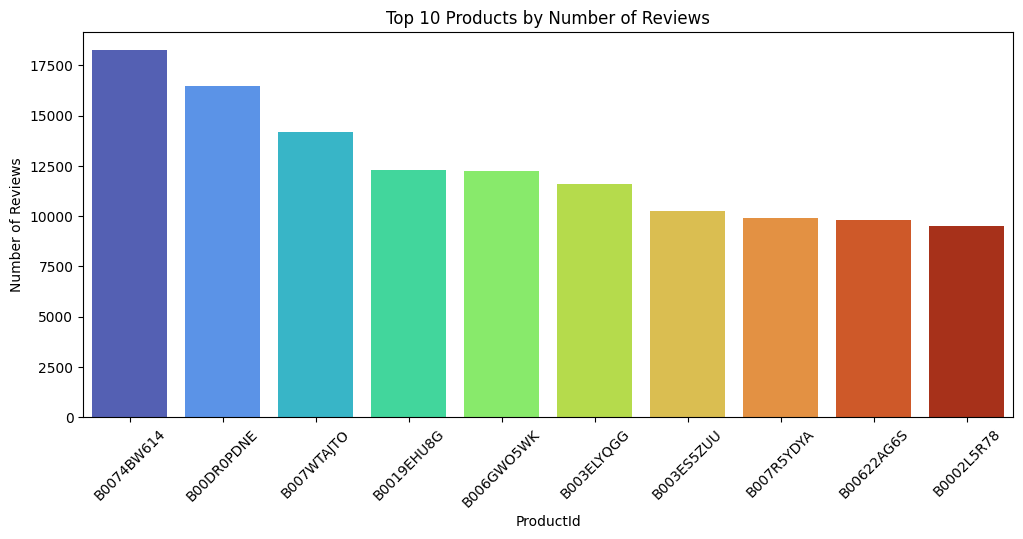

In [24]:
# Top 10 products with the most reviews
top_products = df['product_id'].value_counts().head(10)



# Visualizing Top 10 products
plt.figure(figsize=(12, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette='turbo')
plt.title('Top 10 Products by Number of Reviews')
plt.xlabel('ProductId')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

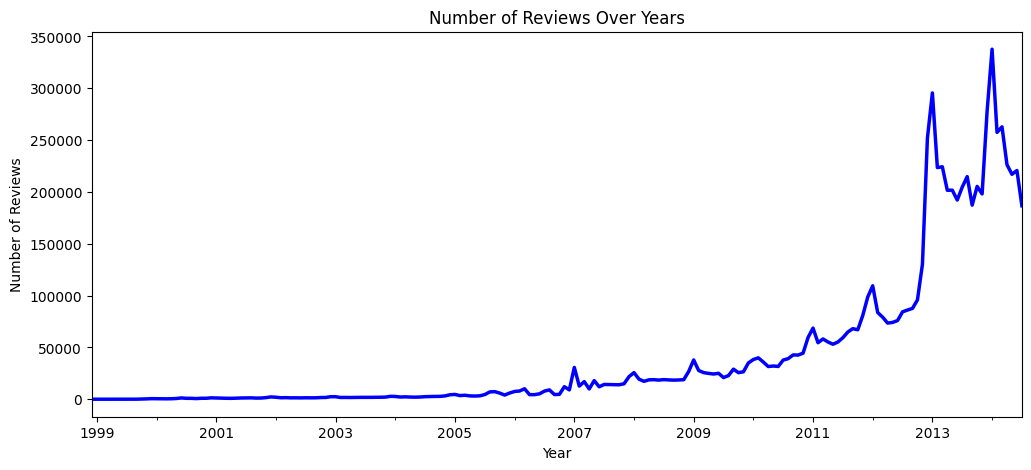

In [16]:
# Convert the Unix timestamp to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Number of reviews over time
plt.figure(figsize=(12, 5))
df.groupby(df['timestamp'].dt.to_period('M')).size().plot(kind='line', linewidth=2.5, color='Blue')
plt.title('Number of Reviews Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

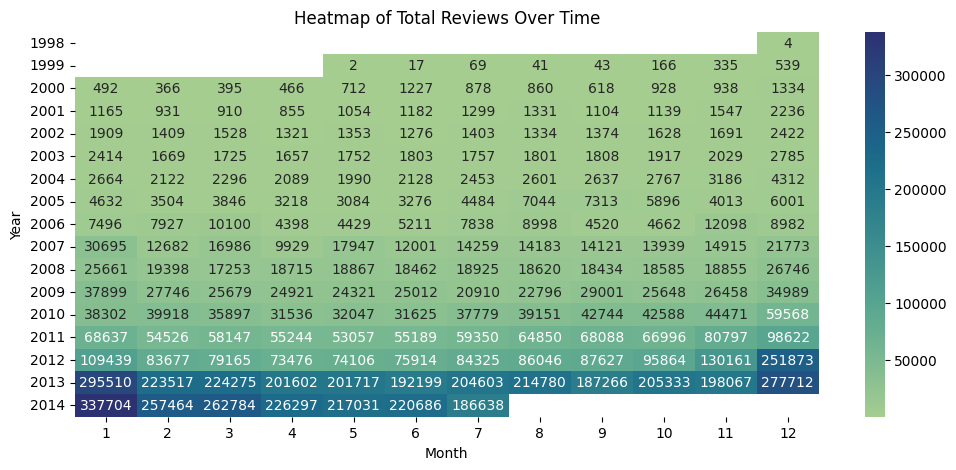

In [28]:
# Extract year and month from the Time column
df['Year'] = df['timestamp'].dt.year
df['Month'] = df['timestamp'].dt.month

# Pivot table to create a heatmap
heatmap_data = df.pivot_table(index='Year', columns='Month', values='rating', aggfunc='count')

plt.figure(figsize=(12, 5))
sns.heatmap(heatmap_data, cmap='crest', annot=True, fmt='g')
plt.title('Heatmap of Total Reviews Over Time')
plt.xlabel('Month')

plt.ylabel('Year')
plt.show()

In [39]:

df_small = df.sample(n=10000)  

# Prepare data for the surprise library
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_small[['user_id', 'product_id', 'rating']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# User-Based Collaborative Filtering
user_based = KNNBasic(sim_options={'user_based': True})
user_based.fit(trainset)
user_predictions = user_based.test(testset)

# Evaluate User-Based CF with RMSE
user_based_rmse = accuracy.rmse(user_predictions)
print(f'User-Based CF RMSE: {user_based_rmse}')

# Evaluate User-Based CF with MSE
user_based_mse = accuracy.mse(user_predictions)
print(f'User-Based CF MSE: {user_based_mse}')

# Evaluate User-Based CF with MAE
user_based_mae = accuracy.mae(user_predictions)
print(f'User-Based CF MAE: {user_based_mae}')

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.3929
User-Based CF RMSE: 1.392897839263526
MSE: 1.9402
User-Based CF MSE: 1.9401643906249997
MAE:  1.1123
User-Based CF MAE: 1.11233875


In [40]:

df_small = df.sample(n=10000)

# Prepare data for surprise library
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_small[['user_id', 'product_id', 'rating']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Item-Based Collaborative Filtering
item_based = KNNBasic(sim_options={'user_based': False})
item_based.fit(trainset)
item_predictions = item_based.test(testset)

# Evaluate Item-Based CF with RMSE
item_based_rmse = accuracy.rmse(item_predictions)
print(f'Item-Based CF RMSE: {item_based_rmse}')

# Evaluate Item-Based CF with MSE
item_based_mse = accuracy.mse(item_predictions)
print(f'Item-Based CF MSE: {item_based_mse}')

# Evaluate Item-Based CF with MAE
item_based_mae = accuracy.mae(item_predictions)
print(f'Item-Based CF MAE: {item_based_mae}')

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4198
Item-Based CF RMSE: 1.4197889147686709
MSE: 2.0158
Item-Based CF MSE: 2.0158005625000004
MAE:  1.1284
Item-Based CF MAE: 1.12835175


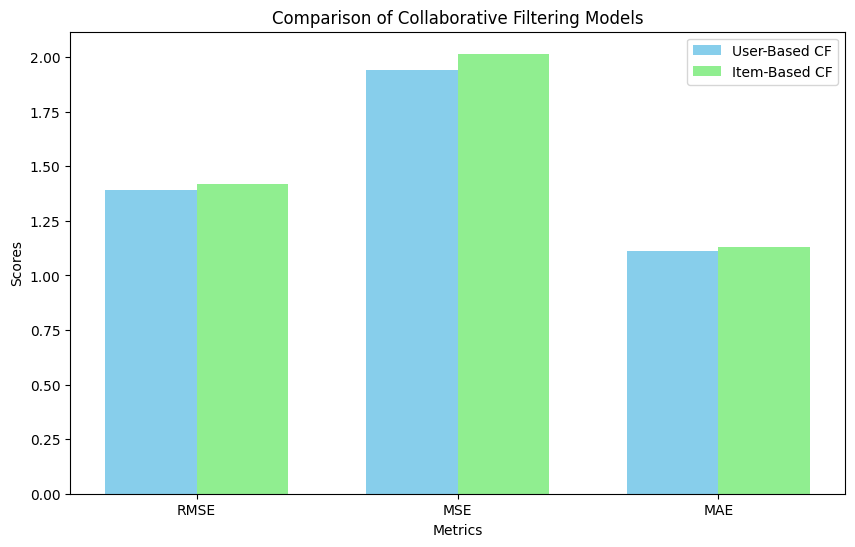

In [41]:
import matplotlib.pyplot as plt
import numpy as np

user_based_metrics = {
    'RMSE': user_based_rmse,
    'MSE': user_based_mse,
    'MAE': user_based_mae
}

item_based_metrics = {
    'RMSE': item_based_rmse,
    'MSE': item_based_mse,
    'MAE': item_based_mae
}

metrics = ['RMSE', 'MSE', 'MAE']
user_based_values = [user_based_metrics[metric] for metric in metrics]
item_based_values = [item_based_metrics[metric] for metric in metrics]

# Bar width
bar_width = 0.35

# X positions for bars
x = np.arange(len(metrics))

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, user_based_values, bar_width, label='User-Based CF', color='skyblue')
plt.bar(x + bar_width/2, item_based_values, bar_width, label='Item-Based CF', color='lightgreen')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Collaborative Filtering Models')
plt.xticks(x, metrics)
plt.legend()

# Show the plot
plt.show()


In [45]:
user_based_metrics = {
    'RMSE': user_based_rmse,
    'MSE': user_based_mse,
    'MAE': user_based_mae
}

item_based_metrics = {
    'RMSE': item_based_rmse,
    'MSE': item_based_mse,
    'MAE': item_based_mae
}

# Create a DataFrame for comparison
comparison_table = pd.DataFrame({
    'User-Based CF': user_based_metrics,
    'Item-Based CF': item_based_metrics
})

comparison_table = comparison_table.T

print("Comparison Table of Collaborative Filtering Models:")
print(comparison_table)

Comparison Table of Collaborative Filtering Models:
                   RMSE       MSE       MAE
User-Based CF  1.392898  1.940164  1.112339
Item-Based CF  1.419789  2.015801  1.128352


In [42]:
trainset_product_ids = trainset.all_items()
product_ids = [trainset.to_raw_iid(iid) for iid in trainset_product_ids]

# Print the first 10 product IDs
print("First 10 products in the training data:")
for i, product_id in enumerate(product_ids[:10]):
    print(f"{i+1}. {product_id}")


First 10 products in the training data:
1. B001BJ8A9W
2. B005972X3Q
3. B00ASUS66W
4. B004OT5X96
5. B003VAGXZC
6. B003U8HV4M
7. B003BVA7BM
8. B008MJ04ZW
9. B00CU9GLX4
10. B00B14E4V0


In [44]:
# Function to get top 25 similar products based on item-based collaborative filtering
def get_top_similar_products(product_id, k=25):
    # Check if product_id is in the trainset
    if product_id in trainset._raw2inner_id_items:
        # Retrieve inner id of the product
        inner_id = item_based.trainset.to_inner_iid(product_id)
        # Get top k similar items to the specified product
        neighbors = item_based.get_neighbors(inner_id, k=k)
        # Convert inner ids to product ids
        neighbors_product_ids = [item_based.trainset.to_raw_iid(inner_id) for inner_id in neighbors]
        return neighbors_product_ids
    else:
        return f"Product ID {product_id} is not part of the trainset."

# Example usage
product_id = 'B001BJ8A9W'
similar_products = get_top_similar_products(product_id)
if isinstance(similar_products, list):
    print(f"Top 25 highly correlated products for {product_id}:")
    for idx, product in enumerate(similar_products):
        print(f"{idx+1}. {product}")
else:
    print(similar_products)


Top 25 highly correlated products for B001BJ8A9W:
1. B005972X3Q
2. B00ASUS66W
3. B004OT5X96
4. B003VAGXZC
5. B003U8HV4M
6. B003BVA7BM
7. B008MJ04ZW
8. B00CU9GLX4
9. B00B14E4V0
10. B001WMAWHG
11. B004BI6MVS
12. B000L47AHG
13. B004QP7Q2U
14. B000VWKSHM
15. B000EVSLRO
16. B009LB2V3I
17. B0040JHVC2
18. B003WKB810
19. B008QWEE24
20. B00B660GE2
21. B008OCF8BM
22. B002K0TU2C
23. B007VA5YOO
24. B000LGFLXO
25. B0052RM8T2
